In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint


warnings.filterwarnings("ignore")

In [2]:
Cremad = "C:/Users/Dell/Speech-Emotion-Recognition-Project/kaggle/input/cremad/AudioWAV"
Ravdess = "C:/Users/Dell/Speech-Emotion-Recognition-Project/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
Savee = "C:/Users/Dell/Speech-Emotion-Recognition-Project/kaggle/input/savee-database/AudioData"

In [3]:
crema_dir = os.listdir(Cremad)

emotions = []
paths = []

for file in crema_dir:
    # storing file paths
    paths.append(Cremad+"/" + file)
    # storing file emotions
    part=file.split('_')
    emotions.append(part[2])
    
#  Creating dataframe out of lists       
emotion_df = pd.DataFrame(emotions, columns=['Emotions'])
path_df = pd.DataFrame(paths, columns=['Path'])


Crema_df = pd.concat([emotion_df, path_df], axis=1)

e_dict={'DIS':'disgusted', 'HAP':'happy', 'SAD':'sad', 'FEA':'fear', 'ANG':'angry', 'NEU':'neutral'}
Crema_df["Emotions"]=Crema_df["Emotions"].apply(lambda x : e_dict[x])

del emotion_df
del path_df

Crema_df.head()

Emotions                                               Path
0      angry  C:/Users/Dell/Speech-Emotion-Recognition-Proje...
1  disgusted  C:/Users/Dell/Speech-Emotion-Recognition-Proje...
2       fear  C:/Users/Dell/Speech-Emotion-Recognition-Proje...
3      happy  C:/Users/Dell/Speech-Emotion-Recognition-Proje...
4    neutral  C:/Users/Dell/Speech-Emotion-Recognition-Proje...

In [4]:
Crema_df["Emotions"].value_counts()

angry        1271
disgusted    1271
fear         1271
happy        1271
sad          1271
neutral      1087
Name: Emotions, dtype: int64

In [5]:
ravdess_directory_list = os.listdir(Ravdess)
file_emotion = []

file_path = []
for i in ravdess_directory_list:
    actor = os.listdir(Ravdess +"/"+ i)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file is emotion
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess+"/" + i + '/' + file)
        
# list to dataframe
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

# Combining 
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# int to emotion
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgusted', 8:'surprised'}, inplace=True)
Ravdess_df.head()

Emotions                                               Path
0  neutral  C:/Users/Dell/Speech-Emotion-Recognition-Proje...
1  neutral  C:/Users/Dell/Speech-Emotion-Recognition-Proje...
2  neutral  C:/Users/Dell/Speech-Emotion-Recognition-Proje...
3  neutral  C:/Users/Dell/Speech-Emotion-Recognition-Proje...
4     calm  C:/Users/Dell/Speech-Emotion-Recognition-Proje...

In [6]:
Ravdess_df["Emotions"].value_counts()

calm         192
happy        192
sad          192
angry        192
fear         192
disgusted    192
surprised    192
neutral       96
Name: Emotions, dtype: int64

In [7]:
# used "next" with "walk" cause "os.listdir" gives error 
directory_list = next(os.walk('C:/Users/Dell/Speech-Emotion-Recognition-Project/kaggle/input/savee-database/AudioData'))[1]
file_emotion = []

file_path = []
for i in directory_list:
    actor = os.listdir(Savee +"/"+ i)
    for file in actor:       
        file_emotion.append(file[:-6])
        file_path.append(Savee+"/" + i + '/' + file)
        
# list to dataframe
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

# Combining 
Savee_df = pd.concat([emotion_df, path_df], axis=1)

# letter to full emotion
Savee_df.Emotions.replace({'a':'angry', 'd':'disgusted', 'f':'fear', 'h':'happy', 'n':'neutral', 'sa':'sad' , 'su':'surprised'}, inplace=True)
Savee_df.head()

Emotions                                               Path
0    angry  C:/Users/Dell/Speech-Emotion-Recognition-Proje...
1    angry  C:/Users/Dell/Speech-Emotion-Recognition-Proje...
2    angry  C:/Users/Dell/Speech-Emotion-Recognition-Proje...
3    angry  C:/Users/Dell/Speech-Emotion-Recognition-Proje...
4    angry  C:/Users/Dell/Speech-Emotion-Recognition-Proje...

In [8]:
# creating Dataframe using above 3 dataframes.
df = pd.concat([Ravdess_df, Crema_df, Savee_df], axis = 0)
df.to_csv("data.csv",index=False)
df.head()

Emotions                                               Path
0  neutral  C:/Users/Dell/Speech-Emotion-Recognition-Proje...
1  neutral  C:/Users/Dell/Speech-Emotion-Recognition-Proje...
2  neutral  C:/Users/Dell/Speech-Emotion-Recognition-Proje...
3  neutral  C:/Users/Dell/Speech-Emotion-Recognition-Proje...
4     calm  C:/Users/Dell/Speech-Emotion-Recognition-Proje...

In [9]:
df.reset_index(drop=True,inplace=True)

In [10]:
df["Emotions"].value_counts()

happy        1523
sad          1523
angry        1523
fear         1523
disgusted    1523
neutral      1303
surprised     252
calm          192
Name: Emotions, dtype: int64

<Axes: xlabel='Emotions', ylabel='count'>

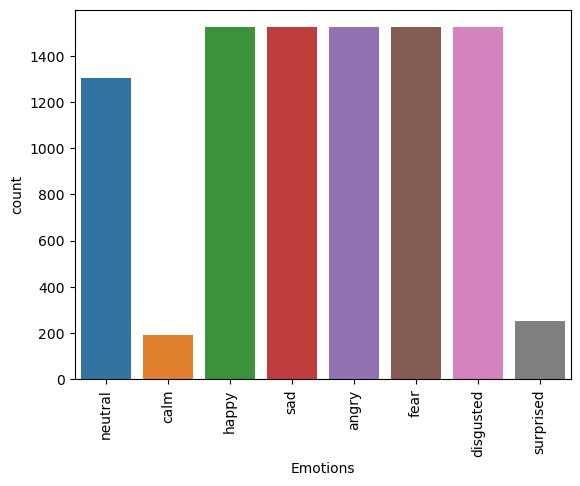

In [11]:
import matplotlib.pyplot as plt
plt.xticks(rotation='vertical')
sns.countplot(x=df["Emotions"])

In [12]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()

def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis="time",y_axis="hz")
    plt.colorbar()

In [13]:
emot=["disgusted","fear","sad","happy","angry","neutral","surprised","calm"]

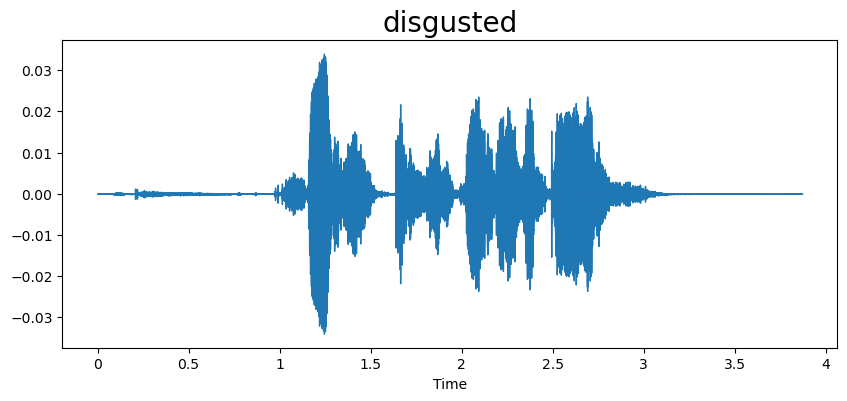

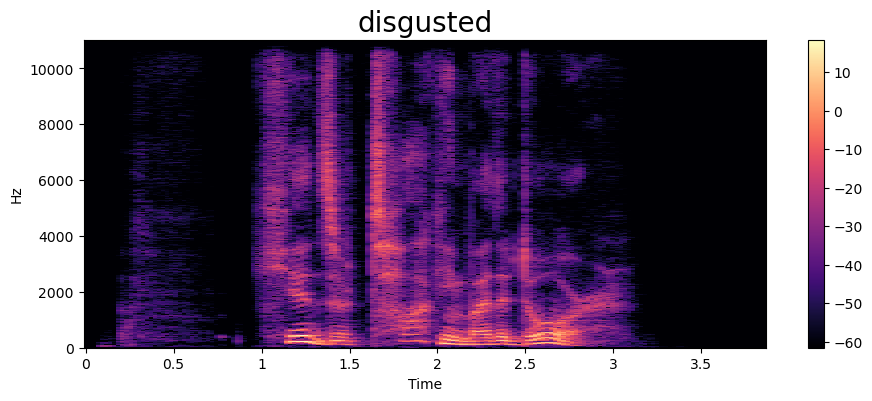

In [14]:
emotion=emot[0]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

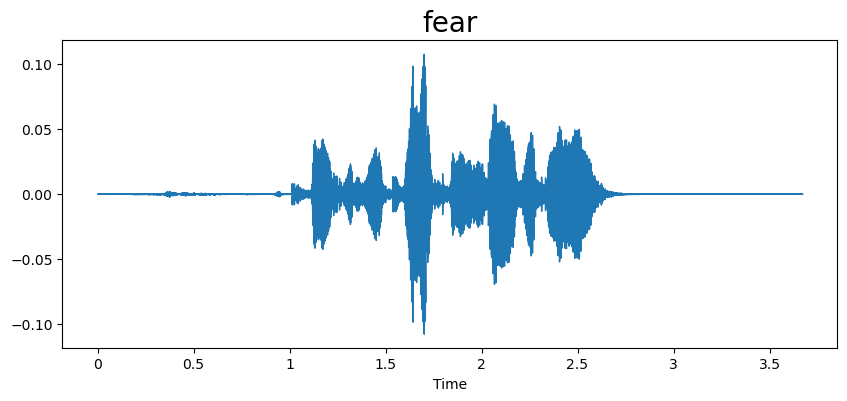

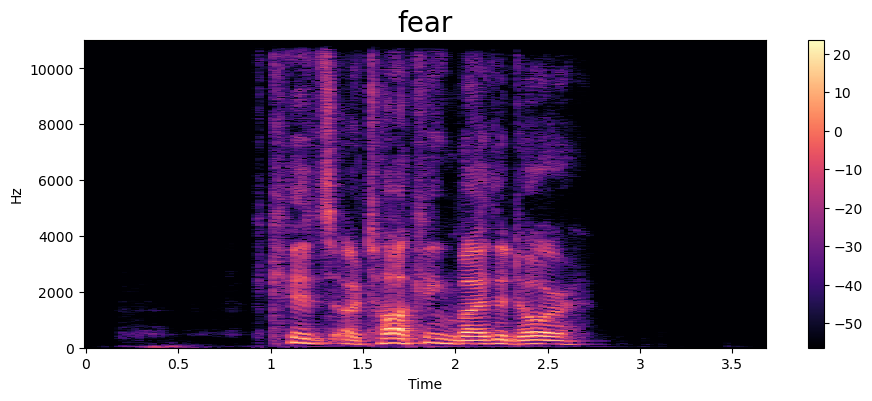

In [15]:
emotion=emot[1]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

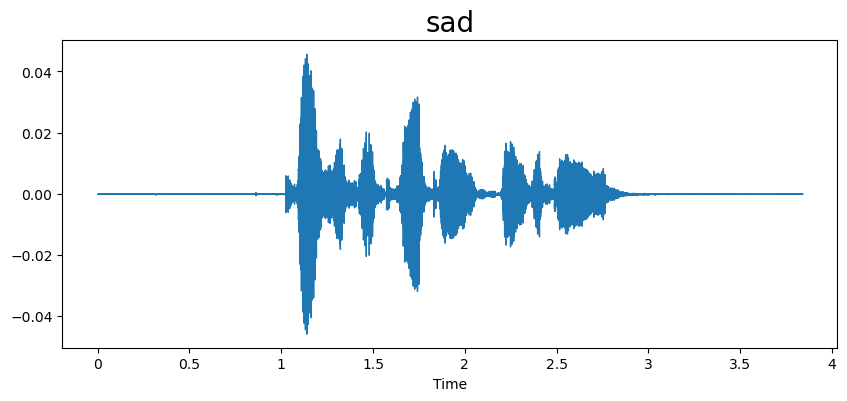

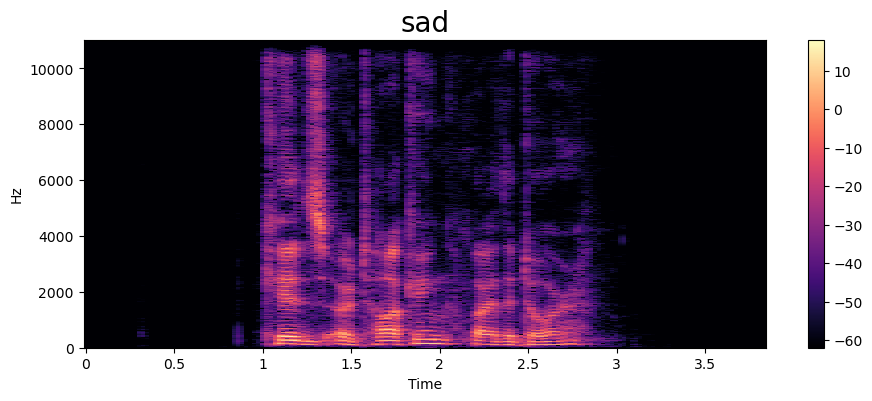

In [16]:
emotion=emot[2]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

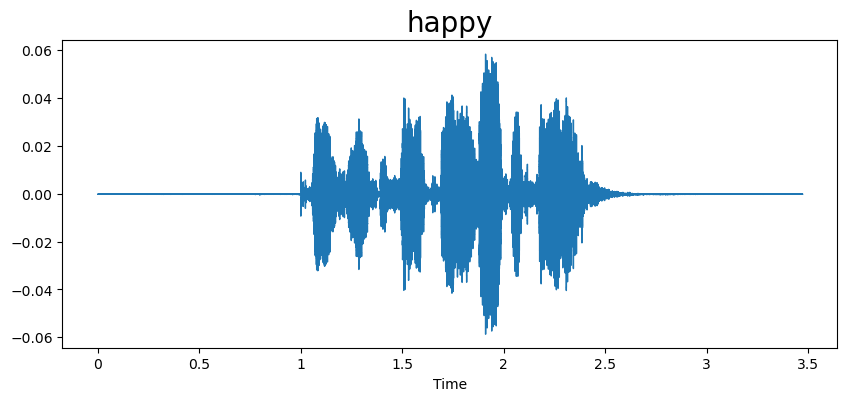

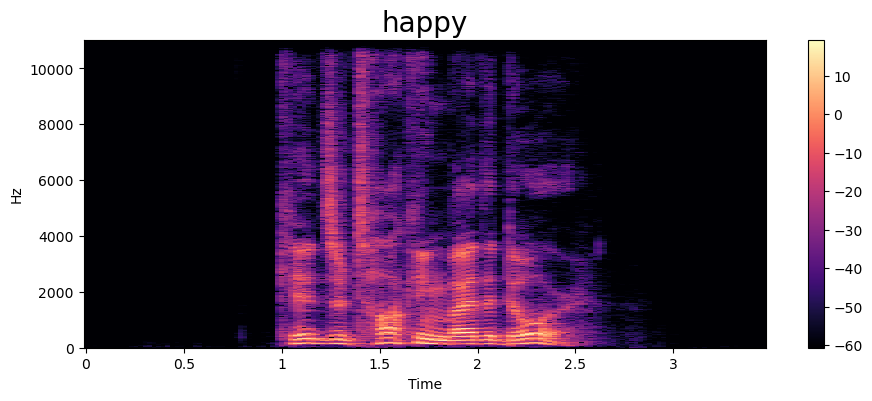

In [17]:
emotion=emot[3]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

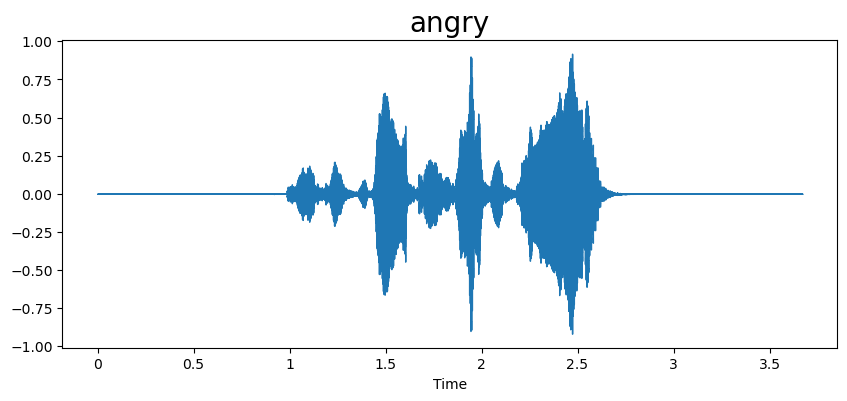

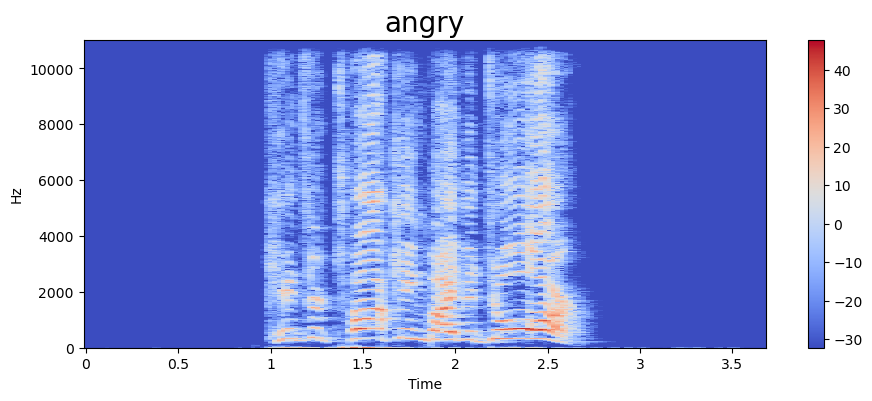

In [18]:
emotion=emot[4]
path=np.array(df["Path"][df["Emotions"]==emotion])[100]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)


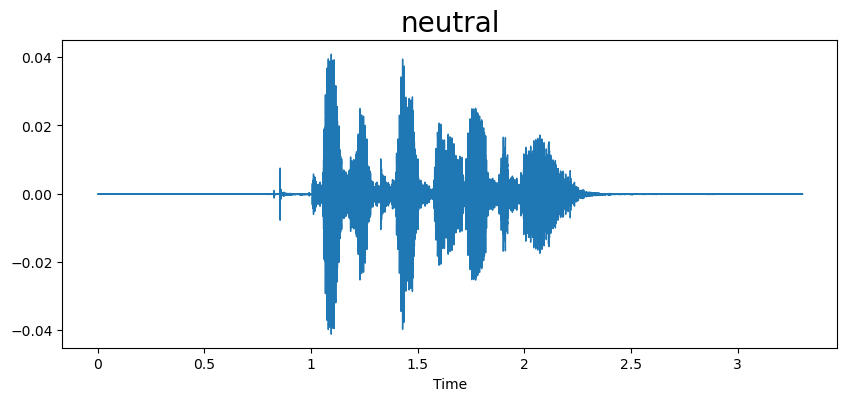

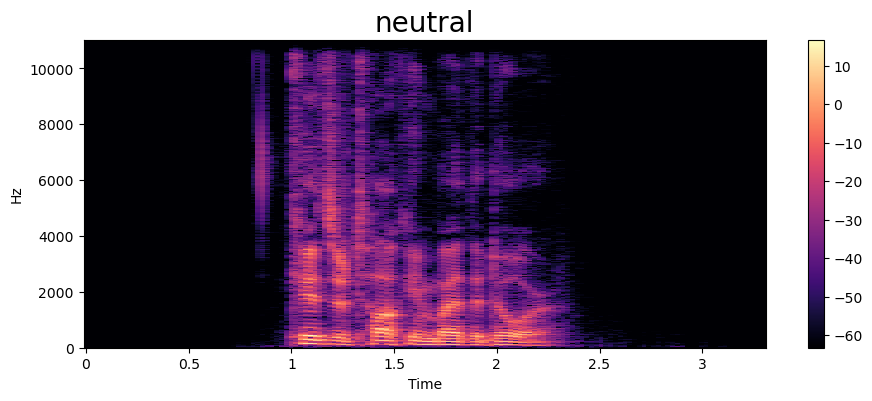

In [19]:
emotion=emot[5]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

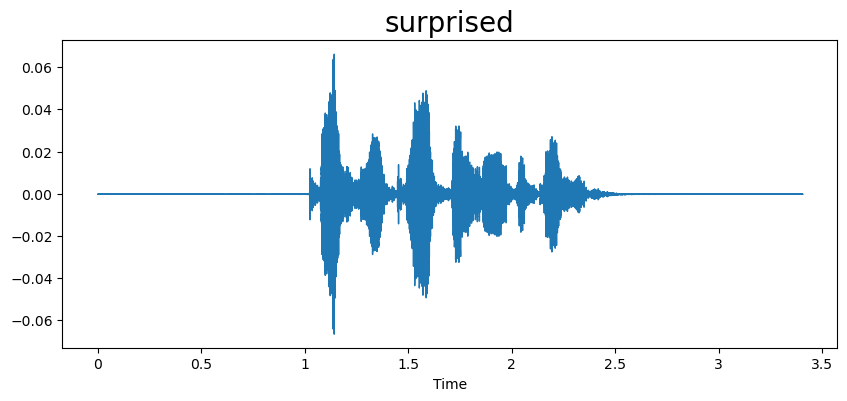

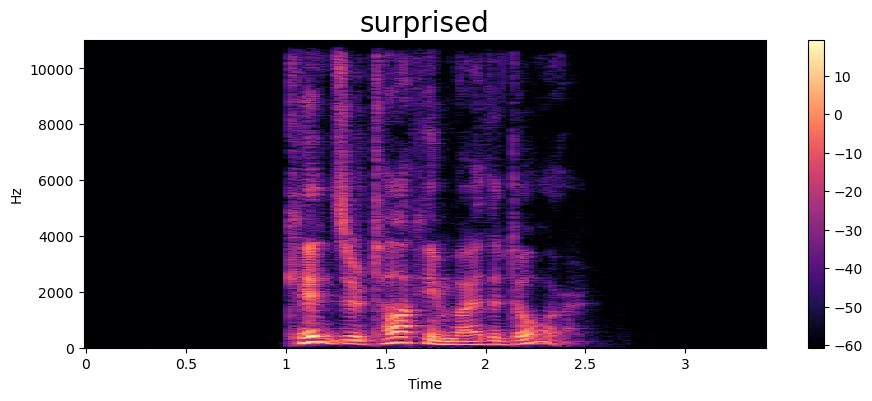

In [20]:
emotion=emot[6]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

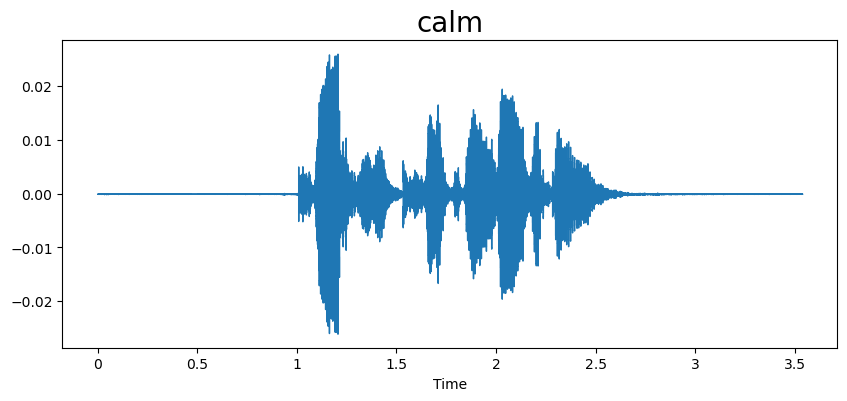

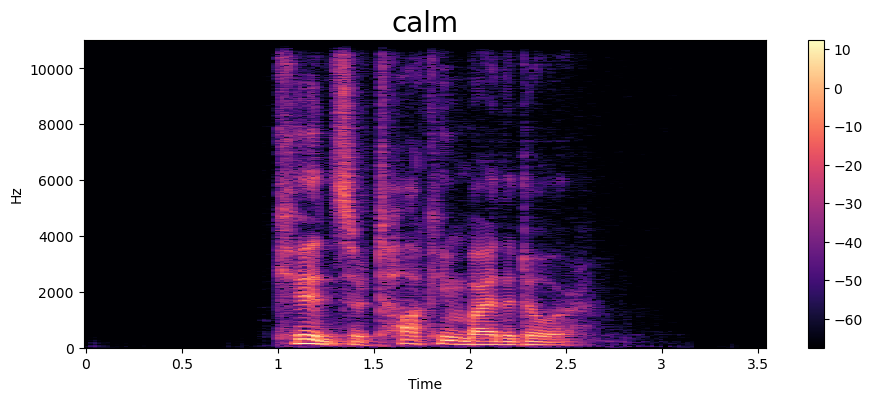

In [21]:
emotion=emot[7]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

In [22]:
def noise(data):
    noise_amp = 0.030*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.75):
    return librosa.effects.time_stretch(data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor)

# taking any example and checking for techniques.
path = np.array(df.Path)[1]
data, sample_rate = librosa.load(path)

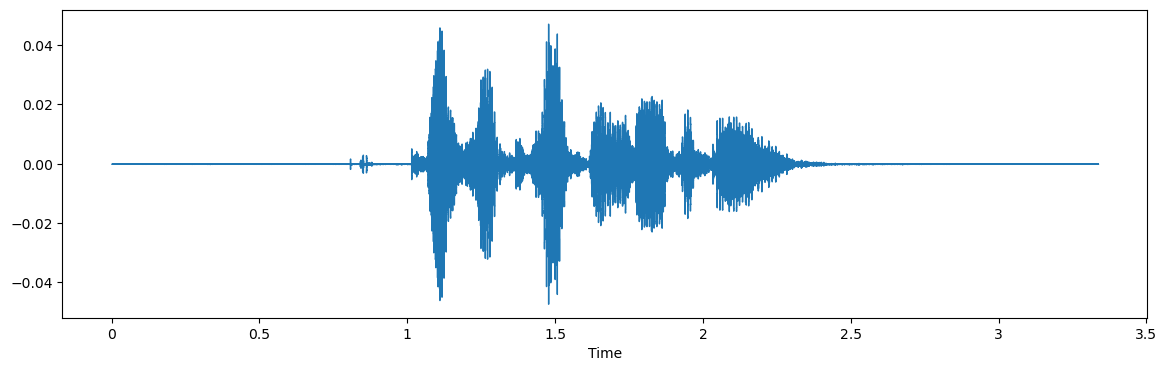

In [23]:
# simple
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

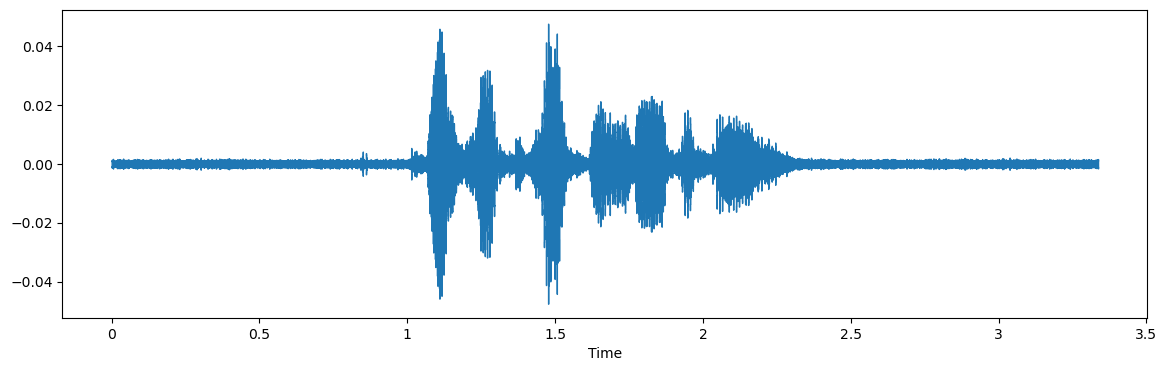

In [24]:
# noise
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)


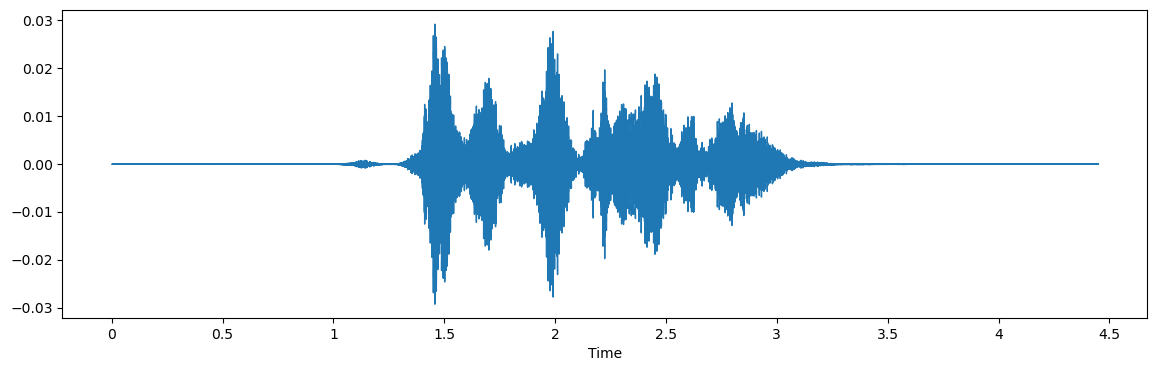

In [25]:
# stretching
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

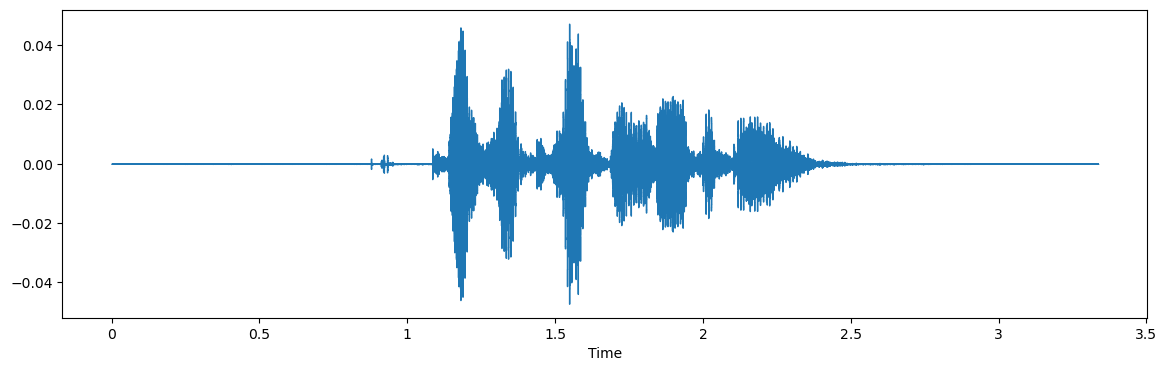

In [26]:
# shifting
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

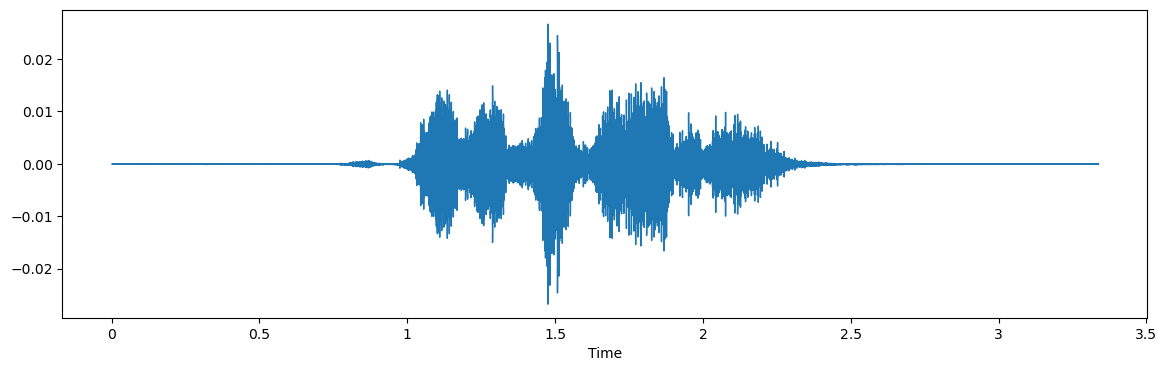

In [27]:
# pitch
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [28]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) 

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) 

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) 

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) 
    
    return result

def get_features(path):
    # duration and offset are used to take care of 
#     the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, sr=None, mono=True, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) 
    
    # stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) 
    
    return result

In [30]:
import tensorflow as tf
tf.config.threading.set_intra_op_parallelism_threads(4)   # adjust to CPU cores
tf.config.threading.set_inter_op_parallelism_threads(4)

In [31]:
from tqdm import tqdm

X, Y = [], []
for path, emotion in tqdm(zip(df["Path"], df["Emotions"]), total=len(df)):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

100%|██████████████████████████████████████████████████████████████████████████████| 9362/9362 [55:02<00:00,  2.84it/s]


In [32]:
len(X), len(Y), df["Path"].shape

(28086, 28086, (9362,))

In [33]:
new_df = pd.DataFrame(X)
new_df['Emotions'] = Y
new_df.to_csv('dataframe.csv', index=False)
new_df.head()

0         1         2         3         4         5         6  \
0  0.063836  0.749525  0.750296  0.753069  0.754371  0.743585  0.742172   
1  0.306327  0.824483  0.835209  0.846450  0.838602  0.828696  0.798963   
2  0.184360  0.720336  0.725762  0.740438  0.757028  0.732754  0.678406   
3  0.056765  0.734230  0.726155  0.746199  0.770009  0.736885  0.729332   
4  0.324119  0.843275  0.847202  0.847631  0.864215  0.868161  0.789668   

          7         8         9  ...           153           154  \
0  0.738247  0.743150  0.719549  ...  2.427509e-07  1.276199e-07   
1  0.734901  0.757722  0.764311  ...  4.461230e-05  4.480042e-05   
2  0.700947  0.748626  0.743515  ...  1.320461e-07  6.894325e-08   
3  0.738348  0.740190  0.726722  ...  2.900011e-07  2.042249e-07   
4  0.743216  0.768527  0.788430  ...  1.230428e-04  1.207884e-04   

            155           156           157           158           159  \
0  1.100925e-07  7.876874e-08  6.864894e-08  4.187237e-08  1.950888e-08   
1  4.691374e-05  4.523977e-05  4.512080e-05  4.481532e-05  4.524964e-05   
2  4.070626e-08  2.769990e-08  1.847204e-08  1.484654e-08  1.387843e-08   
3  1.397750e-07  1.227065e-07  7.330167e-08  7.395916e-08  2.511813e-08   
4  1.226117e-04  1.172883e-04  1.202144e-04  1.187985e-04  1.181655e-04   

            160           161  Emotions  
0  1.567041e-08  1.513520e-08   neutral  
1  4.434826e-05  4.640856e-05   neutral  
2  3.844378e-09  1.989329e-10   neutral  
3  1.570101e-08  1.542399e-08   neutral  
4  1.178463e-04  1.231792e-04   neutral  

[5 rows x 163 columns]

In [34]:
X = new_df.iloc[: ,:-1].values
Y = new_df['Emotions'].values

In [35]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [36]:
from sklearn.model_selection import train_test_split
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.20 , shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((22468, 162), (22468, 8), (5618, 162), (5618, 8))

In [37]:
from sklearn.preprocessing import StandardScaler
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((22468, 162), (22468, 8), (5618, 162), (5618, 8))

In [38]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)

In [39]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((22468, 162, 1), (22468, 8), (5618, 162, 1), (5618, 8))

In [40]:
# model

model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D((2)))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D((2)))
model.add(Conv1D(256, 3, activation='relu'))
model.add(MaxPooling1D((2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 160, 64)             │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 80, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 78, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 39, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 37, 256)             │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 18, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             520 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,248 (2.76 MB)

 Trainable params: 722,248 (2.76 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(64).prefetch(tf.data.AUTOTUNE)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(64).prefetch(tf.data.AUTOTUNE)

In [42]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


es=EarlyStopping(monitor='val_accuracy',patience=3)
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
%time
history = model.fit(train_ds,validation_data=test_ds,epochs=50,callbacks=[rlrp, es])

CPU times: total: 0 ns
Wall time: 1.26 ms
Epoch 1/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 32s 63ms/step - accuracy: 0.2861 - loss: 1.7589 - val_accuracy: 0.3868 - val_loss: 1.5247 - learning_rate: 0.0010
Epoch 2/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 22s 61ms/step - accuracy: 0.3830 - loss: 1.5309 - val_accuracy: 0.4329 - val_loss: 1.4233 - learning_rate: 0.0010
Epoch 3/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 22s 62ms/step - accuracy: 0.4234 - loss: 1.4469 - val_accuracy: 0.4514 - val_loss: 1.3760 - learning_rate: 0.0010
Epoch 4/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 22s 62ms/step - accuracy: 0.4548 - loss: 1.3774 - val_accuracy: 0.4653 - val_loss: 1.3435 - learning_rate: 0.0010
Epoch 5/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 22s 62ms/step - accuracy: 0.4843 - loss: 1.3180 - val_accuracy: 0.4751 - val_loss: 1.3104 - learning_rate: 0.0010
Epoch 6/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.5109 - loss: 1.2490 - val_accuracy: 0.4833 - val_loss: 1.2803 - learning_rate: 0.0010
Epoch 7/50
352/352 ━━━━━━━━━━━━━━━

In [43]:
num_epochs=22

176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5756 - loss: 1.6115
Testing accuracy of our model:  57.262372970581055 %


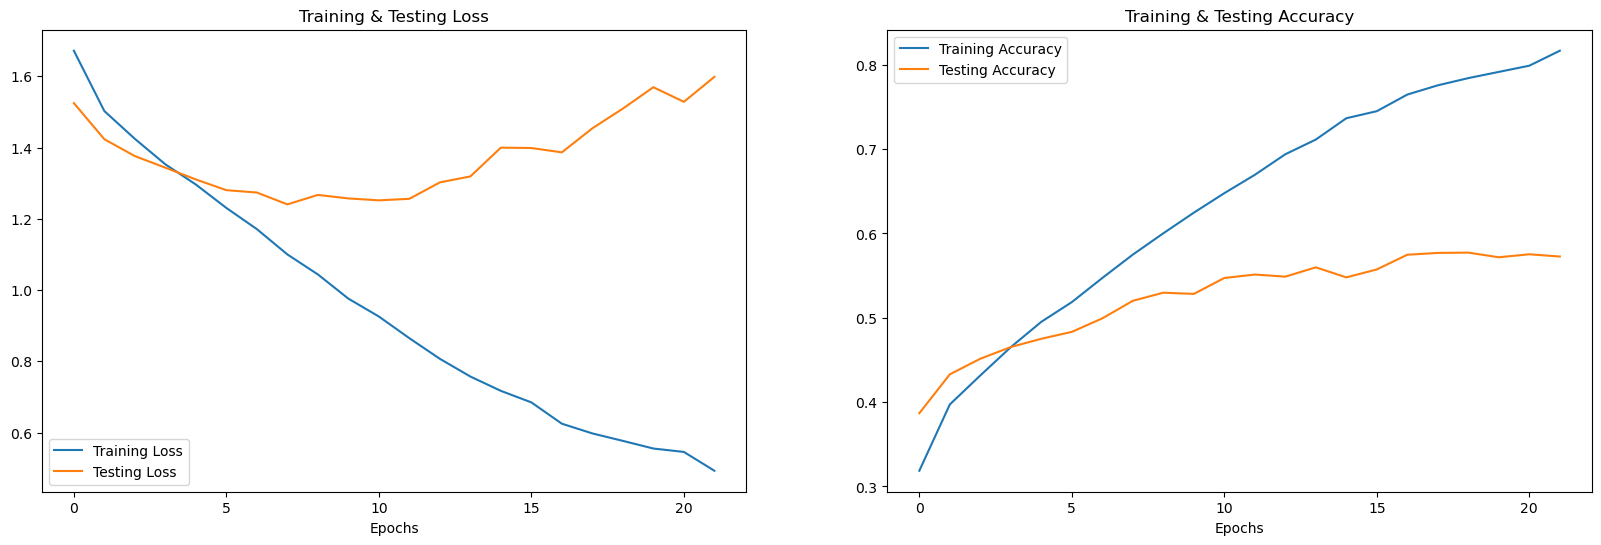

In [44]:
print("Testing accuracy of our model: " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(num_epochs)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [45]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step


In [46]:
c_df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
c_df['Predicted Labels'] = y_pred.flatten()
c_df['Actual Labels'] = y_test.flatten()

In [47]:
c_df.sample(10)

Predicted Labels Actual Labels
2940          neutral           sad
1431          neutral     disgusted
2255        disgusted         happy
1547            angry         angry
3301              sad     disgusted
1875        disgusted     disgusted
68            neutral           sad
3123              sad           sad
4841            happy         happy
3066            angry          fear

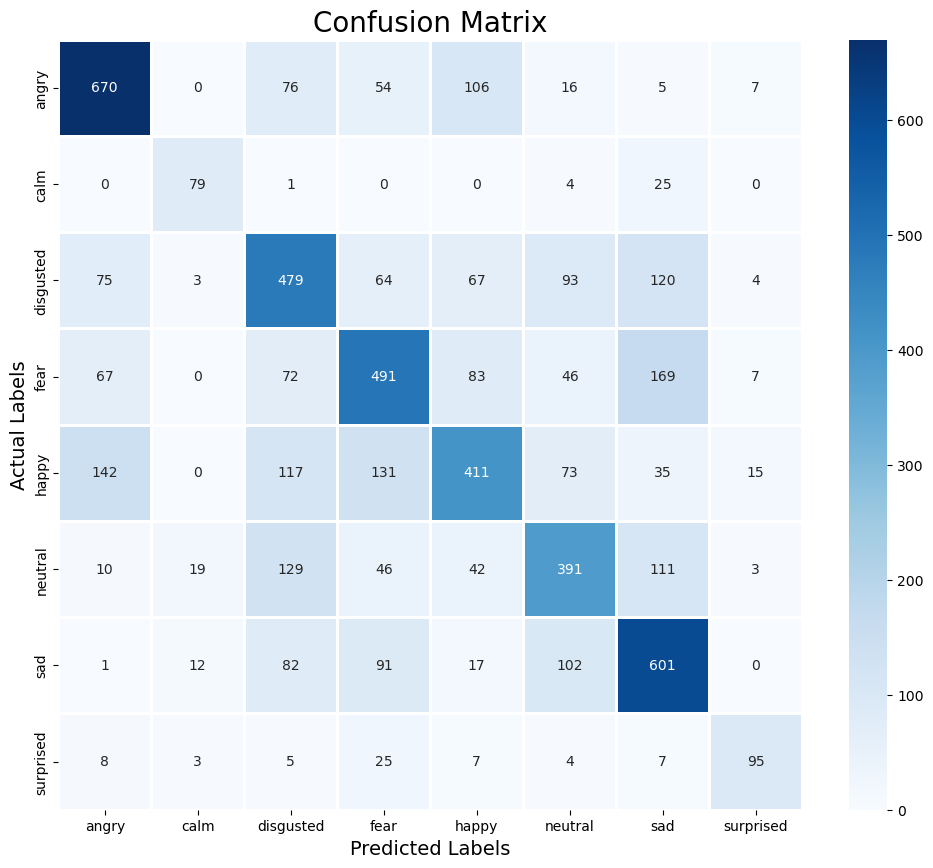

In [48]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.69      0.72      0.70       934
        calm       0.68      0.72      0.70       109
   disgusted       0.50      0.53      0.51       905
        fear       0.54      0.53      0.53       935
       happy       0.56      0.44      0.50       924
     neutral       0.54      0.52      0.53       751
         sad       0.56      0.66      0.61       906
   surprised       0.73      0.62      0.67       154

    accuracy                           0.57      5618
   macro avg       0.60      0.59      0.59      5618
weighted avg       0.57      0.57      0.57      5618

